<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 9 -  Convoluções
**Nome:** Davy Alves de Souza

**Numero Usp:** 11561247









______________




O objetivo desta lista é fazer com que vocês se familiarizem com redes convolucionais, vocês ja tiveram um contato breve com essa arquitetura algumas listas atrás mas dessa vez vocês cuidarão sozinhos da implementação e deverão tomar medidas para evitar overfitting. Novamente, as questões 1 2 e 3 podem ser copiadas de listas anteriores.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
tf.__version__

'2.3.1'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [3]:
b2wCorpus = pd.read_csv("../data/b2w-10k.csv")
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [4]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [5]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
                                                                             1
1970                                                                         1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [6]:
# Selecionando colunas relevantes
processed_data = b2wCorpus[['review_text', 'recommend_to_a_friend']]

# Convertendo str to int [recommend_to_a_friend]
processed_data = processed_data.replace(['Yes', 'No'], [1, 0])

# resultado dos dados processados 
processed_data

,review_text,recommend_to_a_friend
0,Estou contente com a compra entrega rápida o ú...,1
1,"Por apenas R$1994.20,eu consegui comprar esse ...",1
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1
4,"A entrega foi no prazo, as americanas estão de...",1
...,...,...
9994,"Celular muito rápido, com processador e armaze...",1
9995,"achei o produto muito frágil, o material veio ...",0
9996,Uma porcaria pois ñ recebi ñ recomendo pra nin...,0
9997,"Maquina excelente,super pratica. recomendo.ent...",1


### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [7]:
X = processed_data[['review_text']]
y = processed_data[['recommend_to_a_friend']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train = np.asarray(x_train)
x_test  = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

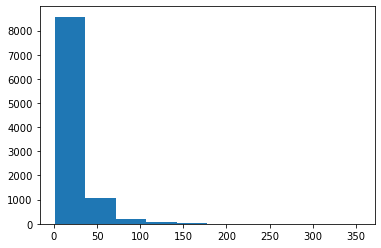

In [8]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [9]:
max_tokens    = 20000
output_len    = 50
embedding_dim = 50

# camada de tokenizacao
vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = max_tokens,
    standardize = "lower_and_strip_punctuation",
    split = "whitespace",
    output_mode = "int",
    output_sequence_length = output_len, 
    pad_to_max_tokens = True)

vectorizer.adapt(x_train)

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 4 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [48]:
voc_size = len(vectorizer.get_vocabulary()) + 2

model = tf.keras.Sequential([
    tf.keras.Input(shape=(None,), dtype=tf.string),
    vectorizer,
    tf.keras.layers.Embedding(voc_size, embedding_dim),
    
    # Conv1D + global max pooling
    tf.keras.layers.Conv1D(128, 5, activation="relu", padding='same'),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.Conv1D(128, 5, activation="relu", padding='same'),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.Conv1D(128, 5, activation="relu", padding='same'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 50)                0         
_________________________________________________________________
embedding_28 (Embedding)     (None, 50, 50)            662350    
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 50, 128)           32128     
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 10, 128)           82048     
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 2, 128)          

### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 5 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes, utilize camadas [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) na sua rede.



In [51]:
model.compile(optimizer = "rmsprop", loss = "mean_squared_error", metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0060 - accuracy: 0.9937
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0052 - accuracy: 0.9942
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0047 - accuracy: 0.9952
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0044 - accuracy: 0.9956
Epoch 5/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0047 - accuracy: 0.9952
Epoch 6/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0047 - accuracy: 0.9952
Epoch 7/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0041 - accuracy: 0.9957
Epoch 8/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0040 - accuracy: 0.9959
Epoch 9/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0039 - accuracy: 0.9961
Epoch 10/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0039 - accuracy: 0.9960

In [52]:
loss, acc = model.evaluate(x = x_test, y = y_test)
print("Training loss: ", round(loss, 2))
print("Training accuracy: ", round(acc * 100, 2), "%\n")

y_pred = model.predict(x_test).round()
print("Confusion matrix(tn,fp,fn,tp): ", confusion_matrix(y_test, y_pred).ravel(), "\n")
print(classification_report(y_test, y_pred, target_names=['nao recomendaria', 'recomendaria']))

63/63 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.8950
Training loss:  0.1
Training accuracy:  89.5 %

Confusion matrix(tn,fp,fn,tp):  [ 393  104  106 1397] 

                  precision    recall  f1-score   support

nao recomendaria       0.79      0.79      0.79       497
    recomendaria       0.93      0.93      0.93      1503

        accuracy                           0.90      2000
       macro avg       0.86      0.86      0.86      2000
    weighted avg       0.90      0.90      0.90      2000

